Problem 3: Chart Image Classification using CNN

Problem statement: You have to develop a CNN based classification architecture for classifying a given chart image to one of five chart classes, namely “Line”,“Dot Line”,“Horizontal Bar”,“Vertical Bar”, and “Pie” chart.

In [53]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Define the paths to your image and csv folders
train_val_dir = '/content/drive/MyDrive/Colab Notebooks/charts/train_val'
test_dir = '/content/drive/MyDrive/Colab Notebooks/charts/test'
train_path_labels =  '/content/drive/MyDrive/Colab Notebooks/charts/train_val.csv'
train_val_labels = pd.read_csv(train_path_labels)

# Load training dataset in Numpy array
images = []
labels = []

for filename in os.listdir(train_val_dir):
    if filename.endswith('.png'):
        # Load the images and resize them to (128, 128) with 3 color channels
        img = cv2.imread(os.path.join(train_val_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        # Append the array to the list of images
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

print(x_train.shape)

# Load test dataset
images = []
labels = []

for filename in os.listdir(test_dir):
    if filename.endswith('.png'):
        img = cv2.imread(os.path.join(test_dir, filename))
        img = cv2.resize(img, (128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)

# Load the saved arrays
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Create a label map and integer labels for each string label in train_val_labels['type']
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]

# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])

# Normalize the data
x_train = x_train / 255.0
x_test = x_train / 255.0

y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

# Split the training images and labels into training and validation sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


(1000, 128, 128, 3)


In [80]:
# Task 2: Implement a two-layer Convolutional Neural Network and calculate accuracy, loss and plot the obtained loss.

cnn_model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 1.6100 - accuracy: 0.1900 - val_loss: 1.6163 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 17s 17s/step - loss: 1.6020 - accuracy: 0.2300 - val_loss: 1.6014 - val_accuracy: 0.1650
Epoch 3/50
1/1 [==============================] - 18s 18s/step - loss: 1.5914 - accuracy: 0.2125 - val_loss: 1.5833 - val_accuracy: 0.3100
Epoch 4/50
1/1 [==============================] - 25s 25s/step - loss: 1.5719 - accuracy: 0.3600 - val_loss: 1.5572 - val_accuracy: 0.4200
Epoch 5/50
1/1 [==============================] - 25s 25s/step - loss: 1.5394 - accuracy: 0.4675 - val_loss: 1.5339 - val_accuracy: 0.3150
Epoch 6/50
1/1 [==============================] - 17s 17s/step - loss: 1.4997 - accuracy: 0.3688 - val_loss: 1.4746 - val_accuracy: 0.4300
Epoch 7/50
1/1 [==============================] - 20s 20s/step - loss: 1.4613 - accuracy: 0.4525 - val_loss: 1.4360 - val_accuracy: 0.3750
Epoch 8/50
1/1 [===========

In [81]:
cnn_model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 14, 64)     

7/7 [==============================] - 4s 490ms/step - loss: 1.0520 - accuracy: 0.5650
Test accuracy: 0.5649999976158142
Test loss: 1.0519731044769287


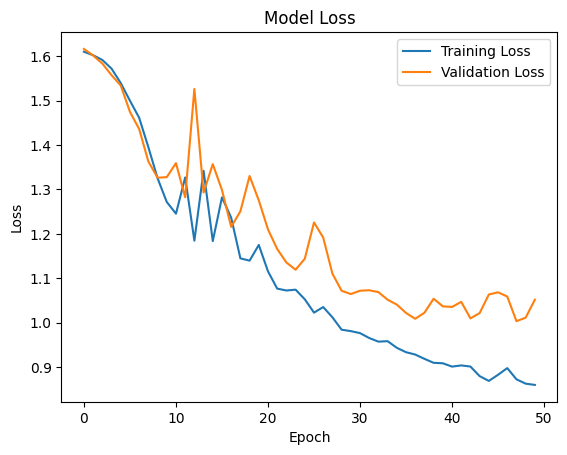

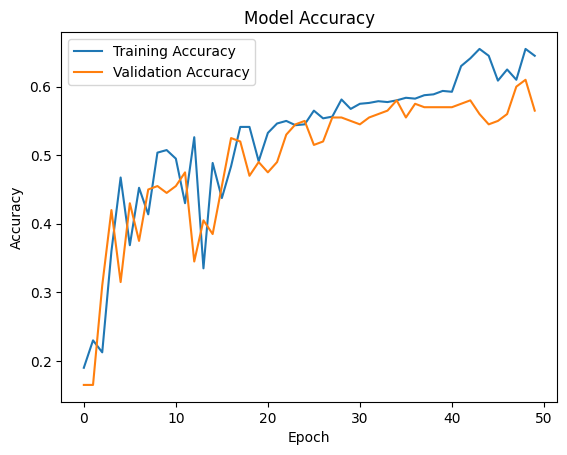

In [88]:
# Evaluate the model on test data
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


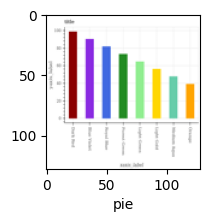

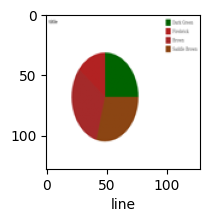

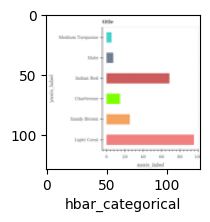

In [92]:
# Function to display image samples
def display_image(x, y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(x[index])
    plt.xlabel(image_classes[y[index]])
    plt.show()

# Display some image samples
display_image(x_test, y_test, 1)
display_image(x_test, y_test, 50)
display_image(x_test, y_test, 60)


7/7 [==============================] - 2s 198ms/step


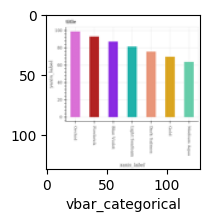

'vbar_categorical'

In [93]:
#Checking predicted and actuals

y_pred = cnn_model.predict(x_test)
y_pred[:5]

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
display_image(x_test,y_test,11) 
image_classes[y_classes[11]] 

7/7 [==============================] - 1s 128ms/step - loss: 1.0520 - accuracy: 0.5650
Test accuracy: 0.5649999976158142
7/7 [==============================] - 1s 134ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.08      0.13        37
           1       0.51      0.80      0.62        44
           2       0.79      0.31      0.45        48
           3       0.45      0.79      0.57        33
           4       0.76      0.89      0.82        38

    accuracy                           0.56       200
   macro avg       0.57      0.57      0.52       200
weighted avg       0.58      0.56      0.52       200

Confusion Matrix:
[[ 3 25  0  1  8]
 [ 2 35  0  6  1]
 [ 3  8 15 22  0]
 [ 1  0  4 26  2]
 [ 0  1  0  3 34]]


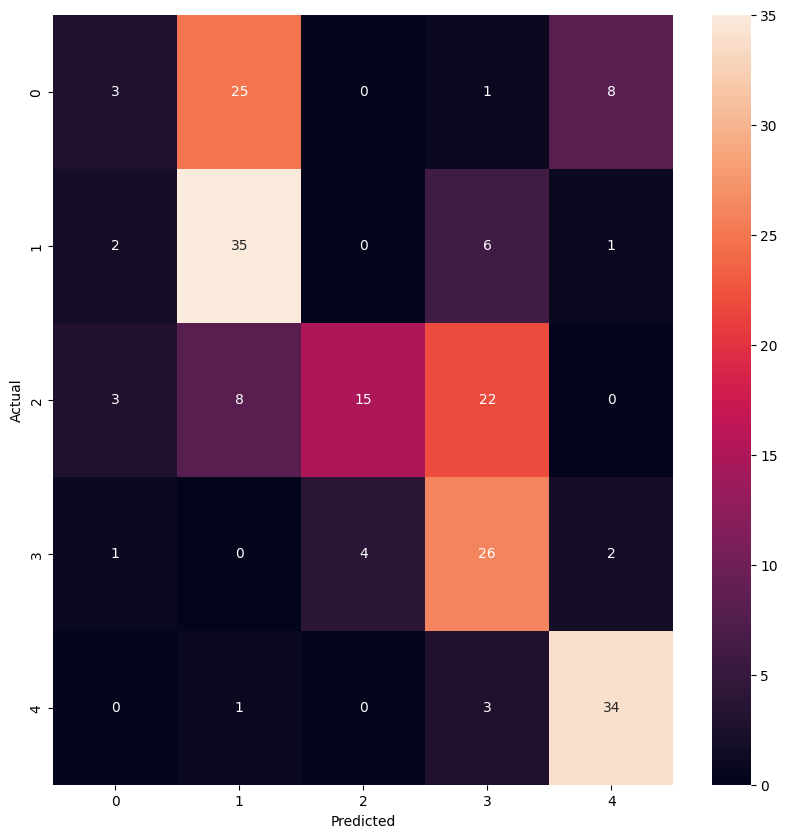

In [94]:
import seaborn as sn 
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

# Make predictions on the test set
y_pred = cnn_model.predict(x_test)
y_classes = np.argmax(y_pred, axis=1)

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_classes))

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sn.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Task 3: Finetune a pretrained network for this task and report the results.

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a new classification layer to the VGG16 model
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling reduces the number of parameters and prevents overfitting
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)

# Freeze the weights of the pre-trained VGG16 layers to prevent overfitting
for layer in pt_model.layers:
    layer.trainable = False

# Print the summary of the model architecture
pt_model.summary()

# Create data generators for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Scale the pixel values between 0 and 1 to make training more efficient
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

# Compile the model
pt_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and obtain history object
history = pt_model.fit(train_generator, epochs=50, validation_data=test_generator)

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = pt_model.evaluate(test_generator)
print('Test accuracy:', test_acc)